# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
#	Libraries version note:
#   •	Numpy 1.26.2
#   •	Pandas 2.2.2
#   •	Statmodels 0.14.4
#   •	Sklearn 1.6.1

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")

In [4]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [6]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [7]:
# Convert categorical features to category type
numerical_features = ['total_busy_dashers', 'total_outstanding_orders', 'total_onshift_dashers']
categorical_features = ['market_id', 'order_protocol']

for feature in numerical_features + categorical_features:
    df[feature] = df[feature].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int32         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int32         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  int32         
 11  total_busy_dashers        175777 non-null  int32         
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [9]:
# Calculate time taken in minutes
df['taken_time_in_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [10]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_hour'] = pd.DatetimeIndex(df['created_at']).hour
df['created_day'] = pd.DatetimeIndex(df['created_at']).dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_day'].apply(lambda x: 1 if x in [5, 6] else 0)
df['isWeekend'] = df['isWeekend'].astype(int)

In [11]:
# Drop unnecessary columns
df.drop(columns=['actual_delivery_time', 'created_at'], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [12]:
# Define target variable (y) and features (X)
target = 'taken_time_in_minutes'
features = df.drop(columns='taken_time_in_minutes').columns


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [13]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [14]:
# Define numerical and categorical columns for easy EDA and data manipulation

categorical_features = [
    'market_id', 'store_primary_category', 'order_protocol', 'created_hour', 'created_day', 'isWeekend'
]

numerical_features = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
    'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance'
]

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [15]:
# Plot distributions for all numerical columns

plt.figure(figsize=(10, 6))
for i, var in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    plt.hist(df_train[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(var)
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [16]:
# Distribution of categorical columns

plt.figure(figsize=(10, 5))
for i, var in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    plt.hist(df_train[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(var)
plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [17]:
# Distribution of time_taken

plt.title('Taken time distribution')
plt.hist(df_train[target], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('minutes')
plt.ylabel('frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [18]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(14, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df_train[feature], y=df_train[target])
    plt.title(f'{target} vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
plt.tight_layout()
plt.show()

In [19]:
# Show the distribution of time_taken for different hours

sns.barplot(x=df_train['created_hour'], y=df_train['taken_time_in_minutes'])
plt.title('Distribution of time_taken for each hours')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [20]:
# Create a DataFrame to analyze correlation between target and numerical features

df_train_corr = pd.concat([df_train[numerical_features], df_train[target]], axis=1).corr()

In [21]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize = (8, 6))
sns.heatmap(df_train_corr, annot=True, fmt=".2f", cmap="Greens")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [22]:
# Drop 3-5 weakly correlated columns from training dataset

top_3_weakly_corr = df_train_corr.corr()['taken_time_in_minutes'].nsmallest(3).index.to_list()
print("Top 3 weakly correlated columns:")
print(top_3_weakly_corr)
df_train.drop(columns=top_3_weakly_corr, inplace=True)

Top 3 weakly correlated columns:
['min_item_price', 'total_onshift_dashers', 'total_busy_dashers']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

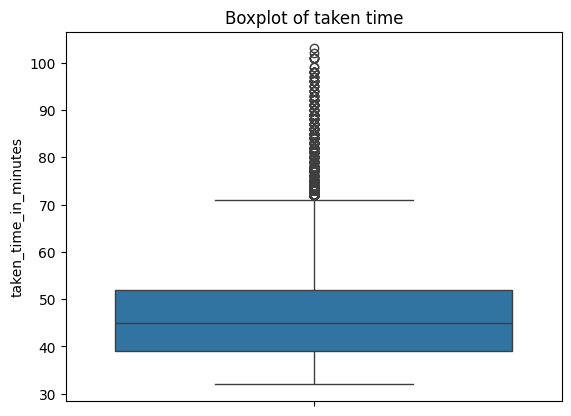

In [23]:
# Boxplot for time_taken

sns.boxplot(df_train[target])
plt.title("Boxplot of taken time")
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

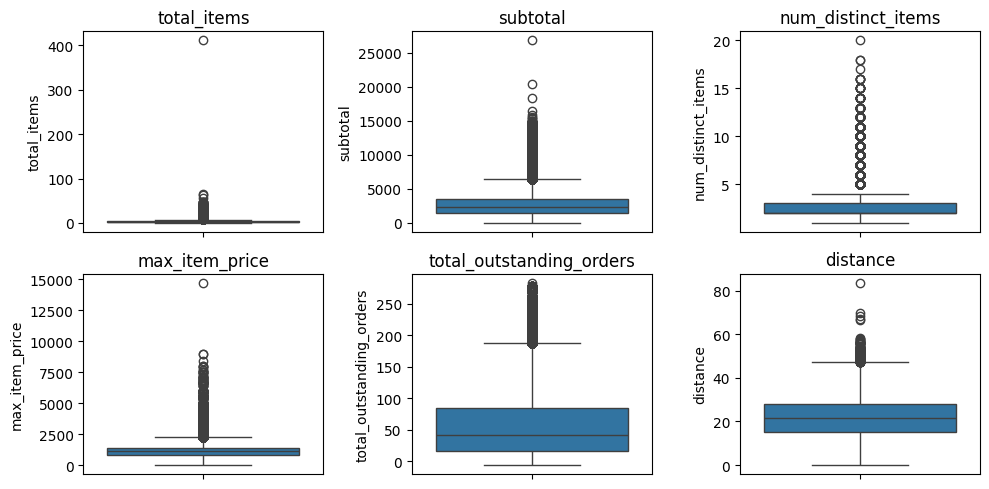

In [24]:
# Boxplot for numerical features

numerical_features = [x for x in numerical_features if x not in top_3_weakly_corr]

plt.figure(figsize=(10, 5))
for i, var in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df_train[var])
    plt.title(var)
plt.tight_layout()
plt.show()

In [25]:
# Handle outliers

def handle_outliner(df):
    df = df[df['taken_time_in_minutes'] < 90]
    df = df[df['taken_time_in_minutes'] > 0]
    for var in numerical_features:
        df = df[df[var] > 0]
    df = df[df['total_items'] < 100]
    df = df[df['subtotal'] < 17000]
    df = df[df['distance'] < 60]
    df = df[df['max_item_price'] < 10000]
    return df

df_train = handle_outliner(df_train)
df_test = handle_outliner(df_test)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [26]:
# Define numerical and categorical columns for easy EDA and data manipulation


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [27]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [28]:
# Distribution of categorical columns


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [29]:
# Distribution of time_taken


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [30]:
# Scatter plot to visualise the relationship between time_taken and other features


#### **4.3** Drop the columns with weak correlations with the target variable

In [31]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [32]:
# Import libraries

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [33]:
# Since 'store_primary_category' contains a large number of unique values,
# we simplify it by grouping them into broader frequency categories:
# 'high', 'medium', and 'low'. This helps reduce cardinality and makes it easier
# to generate meaningful dummy variables for modeling.

df_store_freq = df['store_primary_category'].value_counts()

def categorize_store_freq(category):
    freq = df_store_freq[category]
    if freq > 7500:
        return "high"
    elif freq > 4000 and freq <= 7500:
        return "medium"
    else:
        return "low"

df_train['store_freq'] = df_train['store_primary_category'].apply(lambda x: categorize_store_freq(x))
df_test['store_freq'] = df_test['store_primary_category'].apply(lambda x: categorize_store_freq(x))

In [34]:
# Drop unescessary column

df_train.drop(columns='store_primary_category', inplace=True)
df_test.drop(columns='store_primary_category', inplace=True)

In [35]:
# Based on the visualization in Section 3.1.1, most numerical features are right-skewed.
# To make them more normally distributed — which benefits linear regression — 
# we apply appropriate transformations before building the model.

def transform(df):
    df['taken_time_log'] = np.log1p(df['taken_time_in_minutes'])
    df['total_items_sqrt'] = np.sqrt(df['total_items'])
    df['subtotal_log'] = np.log1p(df['subtotal'])
    df['num_distinct_items_sqrt'] = np.sqrt(df['num_distinct_items'])
    df['max_item_price_log'] = np.log1p(df['max_item_price'])
    df['total_outstanding_orders_sqrt'] = np.sqrt(df['total_outstanding_orders'])
    return df.drop(columns=[
        'total_items',
        'subtotal',
        'num_distinct_items',
        'max_item_price',
        'total_outstanding_orders',
        'taken_time_in_minutes'
    ])

# Re-define numerical features and target after transformation
numerical_features = ['total_items_sqrt', 'subtotal_log', 'num_distinct_items_sqrt', 'max_item_price_log', 'total_outstanding_orders_sqrt', 'distance']
target = 'taken_time_log'

In [36]:
# Apply transformation

df_train = transform(df_train)
df_test = transform(df_test)

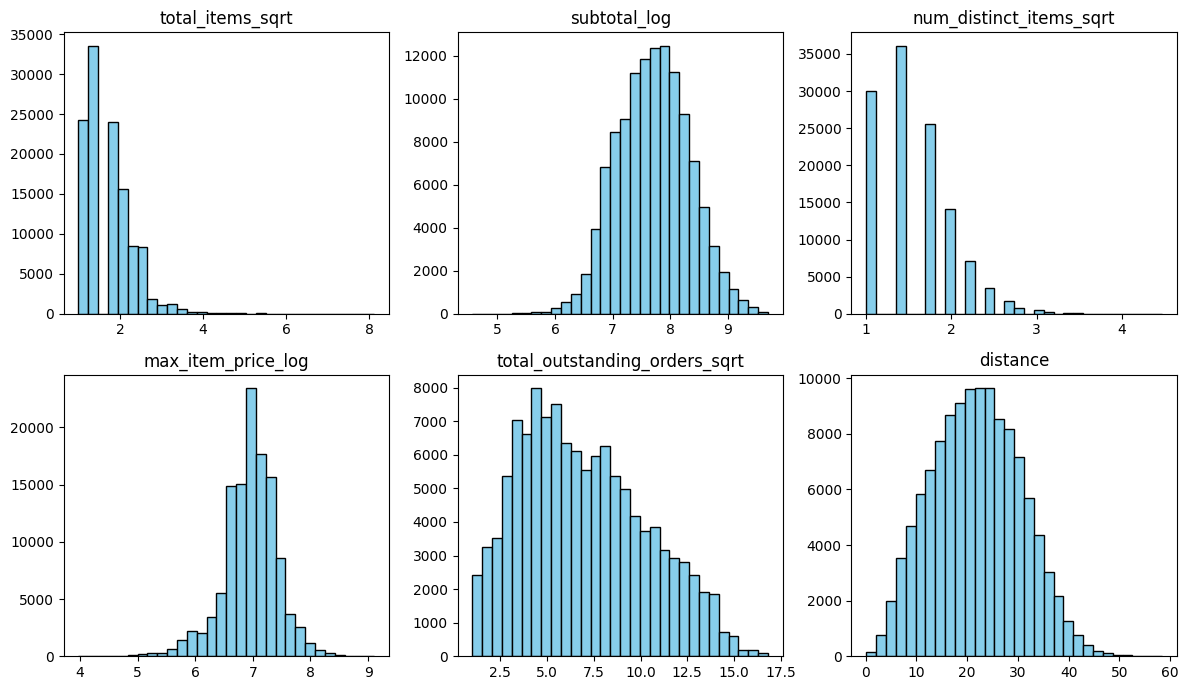

In [37]:
# Plot distributions for all numerical columns after 

plt.figure(figsize=(12, 7))
for i, var in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    plt.hist(df_train[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(var)
plt.tight_layout()
plt.show()

In [38]:
# Apply one-hot encoding to convert categorical features to dummy variables
df_train = pd.get_dummies(df_train, columns=['market_id', 'order_protocol', 'created_day', 'created_hour', 'store_freq'], drop_first=True, dtype=int)
df_test = pd.get_dummies(df_test, columns=['market_id', 'order_protocol', 'created_day', 'created_hour', 'store_freq'], drop_first=True, dtype=int)

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [39]:
# Apply scaling to the numerical columns

# Dataset contains more outliners and MinxMaxScaler is very sensitive with outliners so we use StandardScaler
scaler = StandardScaler()

# Scale numerical data
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

# Extract X_train, y_train
X_train = df_train.drop(columns=target)
y_train = df_train[target]

# Extract X_test, y_test
df_test.drop(columns=top_3_weakly_corr, inplace=True)
X_test = df_test.drop(columns=target)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_test = df_test[target]

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [40]:
# Create/Initialise the model


In [41]:
# Train the model using the training data

def build_lr_model_by_stat(X, y):
    X_train_lm = sm.add_constant(X)
    lr = sm.OLS(y, X_train_lm).fit()
    print(lr.summary())
    return lr

lr_1 = build_lr_model_by_stat(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:         taken_time_log   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     4712.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:26:58   Log-Likelihood:                 86901.
No. Observations:              120021   AIC:                        -1.737e+05
Df Residuals:                  119978   BIC:                        -1.733e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [42]:
# Make predictions

X_test_lm = sm.add_constant(X_test)
y_test_pred = lr_1.predict(X_test_lm)


# Because target has been transformed before model build, it need to be inversed to analyze
y_test_pred = np.expm1(y_test_pred)
y_test = np.expm1(y_test)

In [43]:
# Find results for evaluation metrics

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

Text(0, 0.5, 'y_pred')

In [44]:
# Residual analysis on test data

residuals = y_test - y_test_pred

sns.histplot(residuals, kde=True, bins= 40)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.tight_layout()
plt.show()

In [45]:
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.tight_layout()
plt.show()

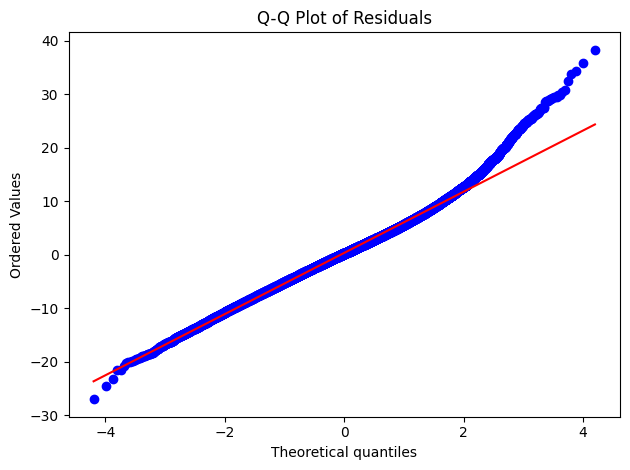

In [46]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [47]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe = RFE(estimator=LinearRegression(), n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [48]:
supported_cols = X_train.columns[rfe.support_]
print(supported_cols)

Index(['distance', 'subtotal_log', 'total_outstanding_orders_sqrt',
       'market_id_2', 'market_id_3', 'market_id_4', 'market_id_5',
       'market_id_6', 'order_protocol_3', 'order_protocol_5',
       'order_protocol_6', 'created_day_1', 'created_day_2', 'created_day_3',
       'created_day_4', 'created_hour_6', 'created_hour_7', 'created_hour_14',
       'created_hour_15', 'created_hour_16', 'created_hour_17',
       'created_hour_20', 'created_hour_21', 'created_hour_22',
       'created_hour_23'],
      dtype='object')


In [49]:
# Build the final model with selected number of features

df_train_rfe = df_train
df_test_rfe = df_test

X_train_rfe = df_train.drop(columns=target)
X_train_rfe = X_train_rfe[supported_cols]
y_train_rfe = df_train[target]

X_test_rfe = df_test.drop(columns=target)
X_test_rfe = X_test_rfe[supported_cols]
y_test_rfe = df_test[target]


lr_2 = build_lr_model_by_stat(X_train_rfe, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:         taken_time_log   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     7478.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:27:03   Log-Likelihood:                 84792.
No. Observations:              120021   AIC:                        -1.695e+05
Df Residuals:                  119995   BIC:                        -1.693e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return vif

In [51]:
vif = calculate_vif(X_train_rfe)

                         Features   VIF
3                     market_id_2  2.04
5                     market_id_4  1.91
2   total_outstanding_orders_sqrt  1.88
8                order_protocol_3  1.55
9                order_protocol_5  1.44
14                  created_day_4  1.22
12                  created_day_2  1.21
13                  created_day_3  1.21
4                     market_id_3  1.21
11                  created_day_1  1.21
6                     market_id_5  1.14
23                created_hour_22  1.13
22                created_hour_21  1.13
24                created_hour_23  1.13
21                created_hour_20  1.12
20                created_hour_17  1.09
19                created_hour_16  1.07
1                    subtotal_log  1.06
15                 created_hour_6  1.03
18                created_hour_15  1.01
7                     market_id_6  1.01
0                        distance  1.01
16                 created_hour_7  1.00
17                created_hour_14  1.00


In [52]:
X_train_rfe.drop(columns=['created_hour_7'], inplace=True)
lr_3 = build_lr_model_by_stat(X_train_rfe, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:         taken_time_log   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     7789.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:27:08   Log-Likelihood:                 84791.
No. Observations:              120021   AIC:                        -1.695e+05
Df Residuals:                  119996   BIC:                        -1.693e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [53]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

dropped_cols = [col for col in X_test_rfe.columns if col not in X_train_rfe.columns]

X_test_rfe.drop(columns=dropped_cols, inplace=True)
X_test_lm = sm.add_constant(X_test_rfe)

y_test_pred = lr_3.predict(X_test_lm)

y_test_pred = np.expm1(y_test_pred)
y_test_rfe = np.expm1(y_test_rfe)

residuals = y_test_rfe - y_test_pred

Text(0, 0.5, 'y_pred')

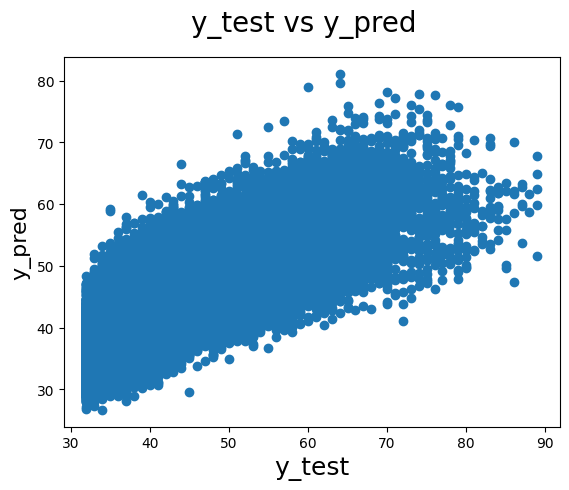

In [54]:
fig = plt.figure()
plt.scatter(y_test_rfe, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

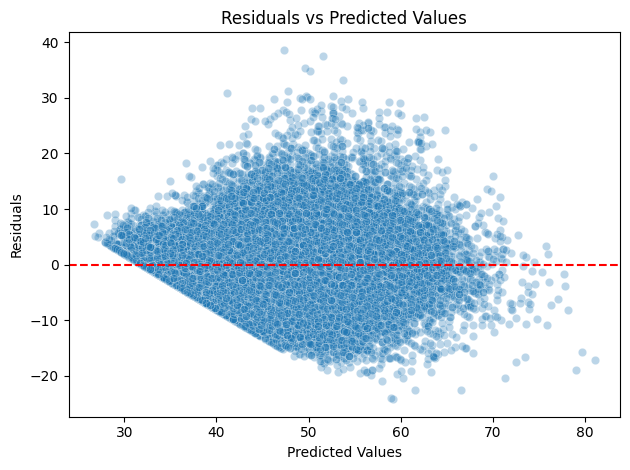

In [55]:
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.tight_layout()
plt.show()

In [56]:
sns.histplot(residuals, kde=True, bins=40)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

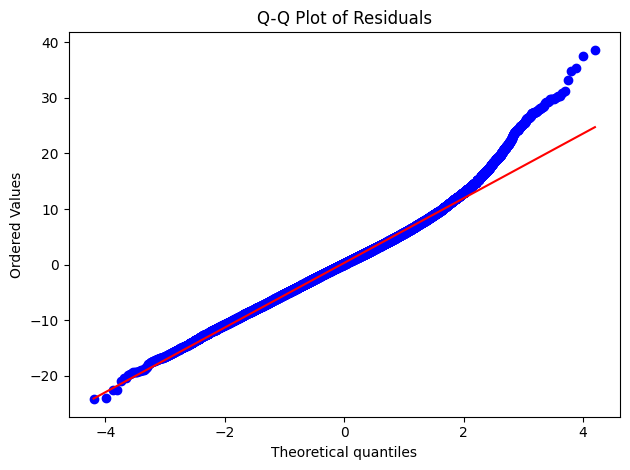

In [57]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [58]:
# Compare the scaled vs unscaled features used in the final model

# Extract scale factor of numerical features from scaler
scale_factor = list(zip(scaler.feature_names_in_, scaler.scale_))
scale_factor = {val[0]:val[1] for val in scale_factor if val[0] in numerical_features}

numerical_features = ['distance', 'subtotal_log', 'total_outstanding_orders_sqrt']

# Extract cofficient values from final model
coef = lr_3.params.copy()

# Apply inverse scaling only for numerical features
for feature in numerical_features:
    if feature in coef.index:
        coef[feature] = coef[feature] * scale_factor[feature]

# Drop constant
coef.drop(index='const', inplace=True)

# Convert Series to DataFrame for heatmap
coef_df = coef.to_frame(name='Coefficient').T

# Plot heatmap
plt.figure(figsize=(17, 4))
sns.heatmap(data=coef_df, annot=True, cmap='Greens', fmt=".2f")
plt.title('Heatmap of Feature Coefficients')
plt.tight_layout()
plt.show()

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [59]:
# Analyze the effect of a unit change in a feature, say 'total_items'

numerical_coef = lr_3.params[numerical_features].reset_index(name='scaled_coef')
# Apply inverse scaling
numerical_coef['unscaled_coef'] = numerical_coef.apply(lambda x: x['scaled_coef'] * scale_factor[x['index']], axis=1)

coef_plot = numerical_coef.melt(id_vars='index', value_vars=['scaled_coef', 'unscaled_coef'],
                                var_name='Type', value_name='Coefficient')

sns.barplot(data=coef_plot, x='index', y='Coefficient', hue='Type')
plt.title('Comparison of Scaled vs Unscaled Coefficients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>
Yes, the dataset contains categorical variables, such as:
- market_id
- order_protocol
- store_primary_category
- created_day
- created_hour
- isWeekend
These variables were one-hot encoded before training the model.

From the coefficient analysis:

- Some categories (e.g., certain `created_hour` values) showed a significant increase in delivery time during peak hours.
- `isWeekend` has a negative coefficient, indicating faster delivery during weekends.
- The impact of `market_id` suggests regional differences in delivery duration.

Thus, categorical variables have a measurable impact on the dependent variable and are essential in understanding delivery time behavior.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>
`test_size = 0.2` means that 20% of the entire dataset will be allocated for testing the model, while the remaining 80% will be used for training. This split helps evaluate the model's performance on unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>
Based on the heatmap, the variable that has the highest correlation with the target variable (`taken_time_in_minutes`) is **`distance`**. This makes intuitive sense, as longer delivery distances are generally associated with longer delivery times.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
>
To detect outliers, I used boxplots, which visually represent the spread of the data and highlight any points that lie beyond the whiskers (typically 1.5×IQR from Q1 or Q3). From the boxplots, it was clear that multiple variables such as taken_time_in_minutes, total_items, subtotal, num_distinct_items, max_item_price, and distance had significant outliers.

To address these outliers, I created a custom function handle_outliner(df) that:

- Removed delivery times less than or equal to 0 or greater than 90 minutes.
- Removed rows where total_items, subtotal, distance, and max_item_price exceeded specific reasonable thresholds.
- Ensured no zero or negative values remained for numerical features that must logically be positive.

This preprocessing helped improve the model's performance and ensured that extreme values didn’t disproportionately influence the regression coefficients.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>
distance – Coefficient: 0.78
→ The most influential feature. Every 1 unit increase in distance increases delivery time by ~0.77 minutes.

total_outstanding_orders_sqrt – Coefficient: 0.27
→ Higher outstanding orders are associated with increased delivery times.

created_hour_14 – Coefficient: 0.14
→ Orders placed around 2 PM seem to take longer — possibly due to operational bottlenecks or peak demand.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
Linear Regression is learning algorithm used for predicting a continuous dependent variable based on one or more independent variables. The goal is to model the relationship between the variables by fitting a linear equation to observed data.
Equation of Linear Regression:
> y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

where:

- y is the dependent variable

- x is the single independent variable

- β₀ is the intercept, β₁ is the slope, and ε is the error term

Linear Regression learns the coefficients by minimizing the cost function, typically the Mean Squared Error (MSE):
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

This is done using methods like:

- Ordinary Least Squares (OLS) – for analytical solution
- Gradient Descent – for iterative optimization, especially on large datasets

Assumptions of Linear Regression:
- Linearity between independent and dependent variables
- Homoscedasticity (constant variance of residuals)
- Independence of errors
- Normality of residuals
- No multicollinearity among features



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
Simple Linear Regression involves one independent variable (predictor) and one dependent variable (response). It models the relationship using a straight line:

>y = β₀ + β₁x + ε

where:

- y is the dependent variable

- x is the single independent variable

- β₀ is the intercept, β₁ is the slope, and ε is the error term

Multiple Linear Regression, on the other hand, uses two or more independent variables to predict the dependent variable. It is an extension of simple linear regression and looks like:

>y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
The cost function in linear regression, typically Mean Squared Error (MSE), measures how well the model's predicted values match the actual target values.

Minimizing this cost function helps find the optimal model parameters (slope and intercept) that result in the least prediction error. This minimization is usually done using optimization algorithms like Gradient Descent, which iteratively updates the model parameters in the direction of the steepest decrease in the cost function until convergence is reached.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>
- Overfitting occurs when a model learns the training data too well, capturing not only the underlying patterns but also the noise and outliers. As a result, it performs very well on training data but poorly on unseen test data due to lack of generalization.

- Underfitting happens when a model is too simple to capture the underlying structure of the data. It performs poorly on both training and test sets because it fails to learn enough from the data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>
Residual plots help in diagnosing a linear regression model by showing the difference between observed and predicted values.

Residuals should be randomly scattered around zero, indicating that the model captures the data pattern well.

Patterns or systematic structures suggest violations of assumptions such as linearity, constant variance (homoscedasticity), or independence.